In [2]:
# Importing Libraries 

import numpy as np 
import pandas as pd 
import matplotlib as mlt
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("TATASTEEL.NS2021.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-21,60.298702,60.846523,58.983925,59.217346,24.028746,43827924
1,2017-08-22,60.017643,60.017643,58.536140,59.031563,23.953358,38737966
2,2017-08-23,59.450768,60.636925,58.736214,60.460667,24.533255,41132489
3,2017-08-24,60.594051,61.027546,60.079571,60.879871,24.703354,51528531
4,2017-08-28,60.989437,61.251438,60.193901,60.579758,24.581575,37426701
...,...,...,...,...,...,...,...
982,2021-08-12,143.600006,144.470001,141.654999,143.535004,63.803455,109431080
983,2021-08-13,140.500000,147.660004,139.065002,146.164993,64.972527,289698720
984,2021-08-16,148.399994,153.449997,147.220001,151.940002,67.539604,271144880
985,2021-08-17,151.940002,153.399994,149.175003,150.369995,66.841713,189709230


In [4]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-21,60.298702,60.846523,58.983925,59.217346,24.028746,43827924
1,2017-08-22,60.017643,60.017643,58.536140,59.031563,23.953358,38737966
2,2017-08-23,59.450768,60.636925,58.736214,60.460667,24.533255,41132489
3,2017-08-24,60.594051,61.027546,60.079571,60.879871,24.703354,51528531
4,2017-08-28,60.989437,61.251438,60.193901,60.579758,24.581575,37426701
...,...,...,...,...,...,...,...
982,2021-08-12,143.600006,144.470001,141.654999,143.535004,63.803455,109431080
983,2021-08-13,140.500000,147.660004,139.065002,146.164993,64.972527,289698720
984,2021-08-16,148.399994,153.449997,147.220001,151.940002,67.539604,271144880
985,2021-08-17,151.940002,153.399994,149.175003,150.369995,66.841713,189709230


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       987 non-null    object 
 1   Open       987 non-null    float64
 2   High       987 non-null    float64
 3   Low        987 non-null    float64
 4   Close      987 non-null    float64
 5   Adj Close  987 non-null    float64
 6   Volume     987 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.1+ KB


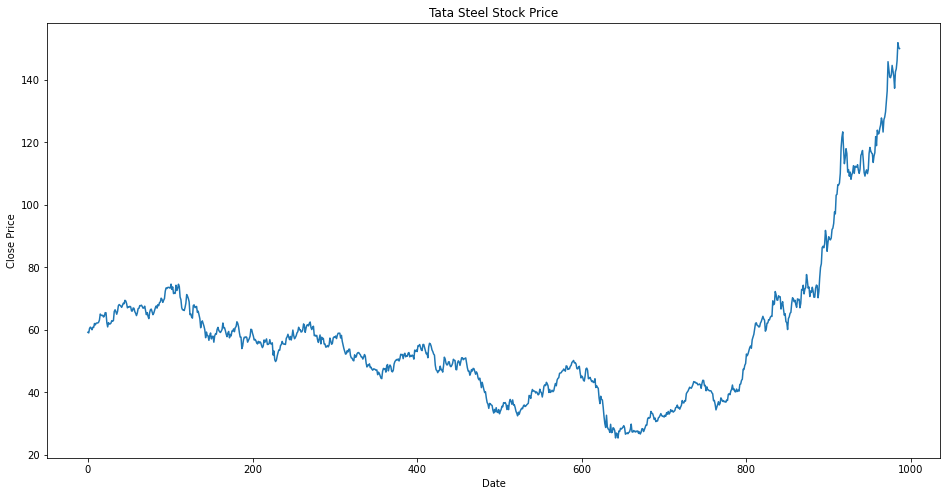

In [7]:
# Visualisation 

plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title("Tata Steel Stock Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [8]:
training_set =df['Open']
training_set = pd.DataFrame(training_set)
training_set

,Open
0,60.298702
1,60.017643
2,59.450768
3,60.594051
4,60.989437
...,...
982,143.600006
983,140.500000
984,148.399994
985,151.940002


In [9]:
# Feature Scaling 

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range = (0,1))
training_set_scaled = scaling.fit_transform(training_set)

In [10]:
# creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 987):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [11]:
# Building RNN 
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [12]:
regressor = Sequential()

In [13]:
# Adding the first time LSTM Layer and Same Dropout regularisation 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM Layer and some Dropout regularisation 
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM Layer and some Dropout regularisation 
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a second LSTM Layer and some Dropout regularisation 
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

In [14]:
# Compiling the RNN 
regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')

# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
29/29 [==============================] - 11s 100ms/step - loss: 0.0195
Epoch 2/100
29/29 [==============================] - 3s 93ms/step - loss: 0.0031
Epoch 3/100
29/29 [==============================] - 3s 89ms/step - loss: 0.0030
Epoch 4/100
29/29 [==============================] - 3s 90ms/step - loss: 0.0029
Epoch 5/100
29/29 [==============================] - 3s 89ms/step - loss: 0.0023
Epoch 6/100
29/29 [==============================] - 3s 94ms/step - loss: 0.0024
Epoch 7/100
29/29 [==============================] - 3s 99ms/step - loss: 0.0024
Epoch 8/100
29/29 [==============================] - 3s 89ms/step - loss: 0.0028
Epoch 9/100
29/29 [==============================] - 3s 89ms/step - loss: 0.0026
Epoch 10/100
29/29 [==============================] - 3s 88ms/step - loss: 0.0020
Epoch 11/100
29/29 [==============================] - 3s 89ms/step - loss: 0.0019
Epoch 12/100
29/29 [==============================] - 3s 93ms/step - loss: 0.0020
Epoch 13/100
29/29 [===

Epoch 99/100
29/29 [==============================] - 2s 56ms/step - loss: 7.0183e-04
Epoch 100/100
29/29 [==============================] - 2s 55ms/step - loss: 8.2443e-04


In [26]:
# Getting the Actual Stock Price in Year 2022
df_test = pd.read_csv('TATASTEEL.NS2022.csv')
actual_stock_price = df_test.iloc[:,1:2].values

df_total = pd.concat((df['Open'], df_test['Open']),axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaling.transform(inputs)

X_test = []
for i in range(60,250):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

C:\Users\NeonPsy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [27]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaling.inverse_transform(predicted_stock_price)

6/6 [==============================] - 5s 30ms/step


In [28]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price

,0
0,148.023392
1,147.488373
2,144.582977
3,141.940750
4,140.342987
...,...
185,119.938080
186,119.212799
187,116.116554
188,111.674904


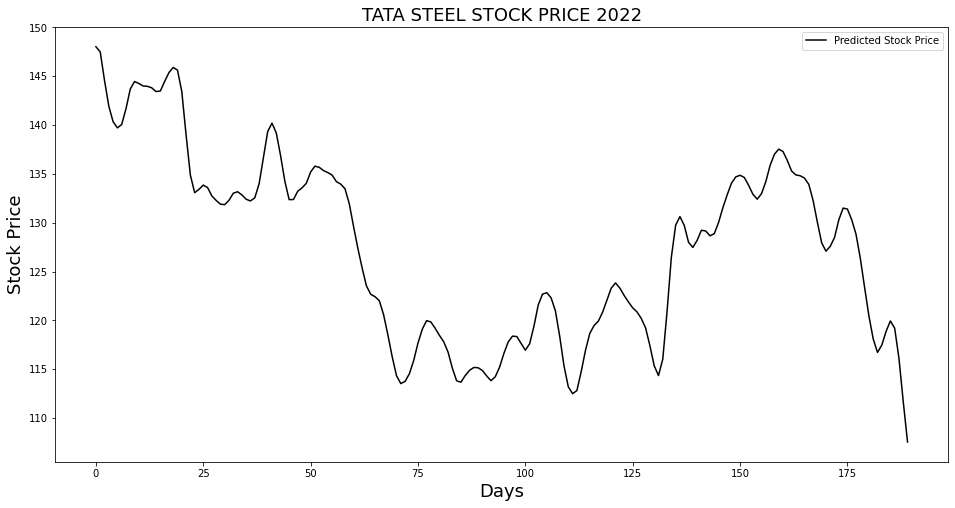

In [29]:
# Plotting the Predicted Stock Price
plt.figure(figsize = (16,8))
plt.plot(predicted_stock_price, color = 'black', label="Predicted Stock Price")
plt.title('TATA STEEL STOCK PRICE 2022', fontsize=18)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.legend()
plt.show()

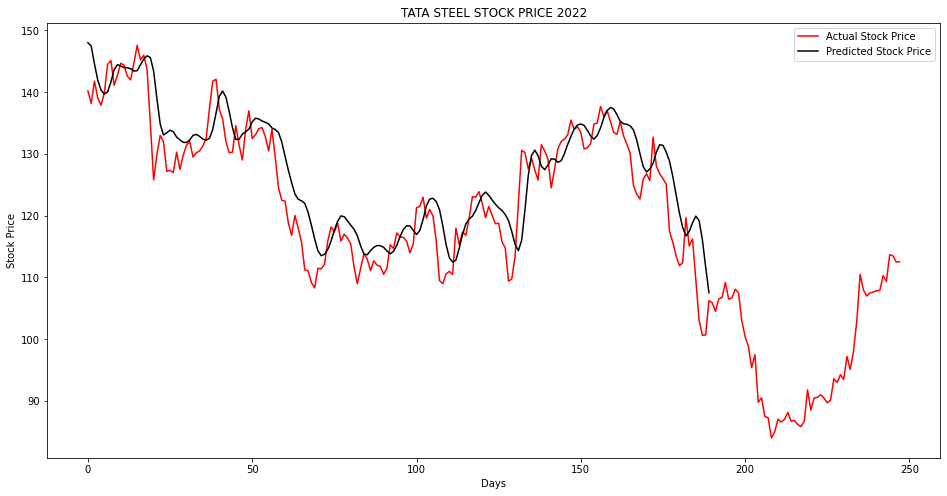

In [30]:
# To Check the Accuracy of Predicted Stock Price

# Plotting the Actual StockPrice and Predicted Stock Price


plt.figure(figsize = (16,8))
plt.plot(actual_stock_price, color = 'red', label="Actual Stock Price")
plt.plot(predicted_stock_price, color = 'black', label="Predicted Stock Price")
plt.title('TATA STEEL STOCK PRICE 2022')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()